In [1]:
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import re
import numpy as np
import time

In [2]:
def district_scraper(state, district):
    URL = f'https://www.opensecrets.org/races/candidates?cycle=2020&id={state}{district}&spec=N'
    
    request_url = requests.get(URL)
    tm=0
    while request_url.status_code != 200:
        print('waiting for ' + state + district)
        time.sleep(10)
        request_url = requests.get(URL)
        tm = tm + 1
        if tm == 10:
            break
    
    soup = BS(requests.get(URL).text)
    
    candidate_list = [x.text.strip() for x in soup.find_all('strong')]
    finances = (pd
        .read_html(
            str(soup.findAll('table', attrs={'class' : 'Members--table'}))
                .replace('$','')
                .replace(':', '')
        )
    )
    
    
    temp_df = pd.DataFrame()
    
    temp_df['name'] = [re.findall(r'(.+ .+) \(\w', item)[0] for item in candidate_list]
    temp_df['party'] = [re.findall(r'\((\w)\)', item)[0] for item in candidate_list]
    temp_df['vote'] = [re.findall(r'(\d*[.?]\d*\%)', item)[0] for item in candidate_list]
    temp_df['winner'] = ['Winner' if re.search(r'(Winner)', str(item)) is not None
                              else 'Not Winner' for item in candidate_list]
    temp_df['incumbent'] = ['Incumbent' if re.search(r'(Incumbent)', str(item)) != None 
                            else 'Not Incumbent' for item in candidate_list]
    temp_df['state'] = str(re.search(r'[A-Z][a-z]+(?: [A-Z][a-z][a-rt-z][a-z]+)?', 
                                     soup.findAll('title')[0].text)[0])
    temp_df['district'] = str(re.findall(r'District ([0-9]{2})', soup.findAll('title')[0].text)[0])
    temp_df['raised'] = [finances[i].iloc[0,1] for i in range(len(candidate_list))]
    temp_df['spent'] = [finances[i].iloc[1,1] for i in range(len(candidate_list))]
    temp_df['cash_on_hand'] = [finances[i].iloc[2,1] for i in range(len(candidate_list))]
    
    global candidate_df
    candidate_df = pd.concat([candidate_df, temp_df])
    candidate_df = candidate_df.reset_index(drop=True)

In [3]:
district_url = 'https://www.britannica.com/topic/United-States-House-of-Representatives-Seats-by-State-1787120'
district_soup = BS(requests.get(district_url).text)
district_df = pd.read_html(str(district_soup.find('table')))[0]
district_df

,state,representatives
0,Alabama,7
1,Alaska,1
2,Arizona,9
3,Arkansas,4
4,California,53
5,Colorado,7
6,Connecticut,5
7,Delaware,1
8,Florida,27
9,Georgia,14


In [4]:
state_url = 'https://www.50states.com/abbreviations.htm'
state_soup = BS(requests.get(state_url).text)

state_df = (
    pd.read_html(str(state_soup.find('table', 
                                            attrs={'class' : 'table table-hover'})))[0]
    .drop(columns = 'STANDARD ABBREVIATION')
    .rename(columns = {'US STATE' : 'state',
                       'POSTAL ABBREVIATION' : 'abbrev'})
)
state_df

,state,abbrev
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA
5,Colorado,CO
6,Connecticut,CT
7,Delaware,DE
8,Florida,FL
9,Georgia,GA


In [5]:
state_details = pd.merge(state_df, district_df, how='inner', on='state')
state_details

,state,abbrev,representatives
0,Alabama,AL,7
1,Alaska,AK,1
2,Arizona,AZ,9
3,Arkansas,AR,4
4,California,CA,53
5,Colorado,CO,7
6,Connecticut,CT,5
7,Delaware,DE,1
8,Florida,FL,27
9,Georgia,GA,14


In [6]:
district_dictionary = state_details.set_index('abbrev')['representatives'].to_dict()
district_dictionary

{'AL': 7,
 'AK': 1,
 'AZ': 9,
 'AR': 4,
 'CA': 53,
 'CO': 7,
 'CT': 5,
 'DE': 1,
 'FL': 27,
 'GA': 14,
 'HI': 2,
 'ID': 2,
 'IL': 18,
 'IN': 9,
 'IA': 4,
 'KS': 4,
 'KY': 6,
 'LA': 6,
 'ME': 2,
 'MD': 8,
 'MA': 9,
 'MI': 14,
 'MN': 8,
 'MS': 4,
 'MO': 8,
 'MT': 1,
 'NE': 3,
 'NV': 4,
 'NH': 2,
 'NJ': 12,
 'NM': 3,
 'NY': 27,
 'NC': 13,
 'ND': 1,
 'OH': 16,
 'OK': 5,
 'OR': 5,
 'PA': 18,
 'RI': 2,
 'SC': 7,
 'SD': 1,
 'TN': 9,
 'TX': 36,
 'UT': 4,
 'VT': 1,
 'VA': 11,
 'WA': 10,
 'WV': 3,
 'WI': 8,
 'WY': 1}

In [8]:
candidate_df = pd.DataFrame()

for key, val in district_dictionary.items():
        for num in range(1, val + 1):
            district_scraper(key, str(num).zfill(2))

waiting for FL13
waiting for FL13
waiting for FL13
waiting for FL13
waiting for FL13
waiting for FL13
waiting for FL13


In [9]:
candidate_df

,name,party,vote,winner,incumbent,state,district,raised,spent,cash_on_hand
0,Jerry Carl,R,64.9%,Winner,Not Incumbent,Alabama,01,1971321,1859349,111973
1,James Averhart,D,35.0%,Not Winner,Not Incumbent,Alabama,01,80095,78973,1122
2,Barry Moore,R,65.3%,Winner,Not Incumbent,Alabama,02,650807,669368,-13633
3,Phyllis Harvey-Hall,D,34.6%,Not Winner,Not Incumbent,Alabama,02,56050,55988,0
4,Mike D Rogers,R,67.5%,Winner,Incumbent,Alabama,03,1193111,1218564,502234
...,...,...,...,...,...,...,...,...,...,...
887,Tricia Zunker,D,39.2%,Not Winner,Not Incumbent,Wisconsin,07,1261957,1232690,29267
888,Mike Gallagher,R,64.0%,Winner,Incumbent,Wisconsin,08,3202905,2841801,1169362
889,Amanda Stuck,D,36.0%,Not Winner,Not Incumbent,Wisconsin,08,416978,399916,2165
890,Liz Cheney,R,68.6%,Winner,Incumbent,Wyoming,01,3003883,3060167,153567


4. Using your scraped data, investigates different relationships between candidates and the amount of money they raised. Here are some suggestions to get you started, but feel free to pose you own questions or do additional exploration:  
    a. How often does the candidate who raised more money win a race?  

In [10]:
max_raised = candidate_df.groupby(['state', 'district'])['raised'].transform('max').to_frame()
max_raised

,raised
0,1971321
1,1971321
2,650807
3,650807
4,1193111
...,...
887,2637459
888,3202905
889,3202905
890,3003883


In [11]:
candidate_df['max_raised'] = candidate_df.groupby(['state', 'district'])['raised'].transform('max')

In [18]:
candidate_df.loc[(candidate_df['raised'] == candidate_df['max_raised']) & (candidate_df['winner'] == 'Winner')]

,name,party,vote,winner,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent
0,Jerry Carl,R,64.9%,Winner,Not Incumbent,Alabama,01,1971321,1859349,111973,1971321,1859349
2,Barry Moore,R,65.3%,Winner,Not Incumbent,Alabama,02,650807,669368,-13633,650807,669368
4,Mike D Rogers,R,67.5%,Winner,Incumbent,Alabama,03,1193111,1218564,502234,1193111,1218564
6,Robert B Aderholt,R,82.5%,Winner,Incumbent,Alabama,04,1255076,1323812,647004,1255076,1323812
7,Mo Brooks,R,95.8%,Winner,Incumbent,Alabama,05,655365,210045,1137501,655365,210045
...,...,...,...,...,...,...,...,...,...,...,...,...
882,Scott Fitzgerald,R,60.2%,Winner,Not Incumbent,Wisconsin,05,1155721,968406,187315,1155721,968406
884,Glenn S Grothman,R,59.3%,Winner,Incumbent,Wisconsin,06,1815756,1736659,269431,1815756,1736659
886,Tom Tiffany,R,60.8%,Winner,Incumbent,Wisconsin,07,2637459,2514740,122719,2637459,2514740
888,Mike Gallagher,R,64.0%,Winner,Incumbent,Wisconsin,08,3202905,2841801,1169362,3202905,2841801


In [21]:
#Tomo's method
candidate_df[
    candidate_df['raised']
    .isin(candidate_df.groupby(by=['state', 'district'])['raised'].max())
    ].groupby(by='winner').count()

,name,party,vote,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent
winner,,,,,,,,,,,
Not Winner,51,51,51,51,51,51,51,51,51,51,51
Winner,384,384,384,384,384,384,384,384,384,384,384


b. How often does the candidate who spent more money win a race? 

In [17]:
candidate_df['max_spent'] = candidate_df.groupby(['state', 'district'])['spent'].transform('max')
candidate_df

,name,party,vote,winner,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent
0,Jerry Carl,R,64.9%,Winner,Not Incumbent,Alabama,01,1971321,1859349,111973,1971321,1859349
1,James Averhart,D,35.0%,Not Winner,Not Incumbent,Alabama,01,80095,78973,1122,1971321,1859349
2,Barry Moore,R,65.3%,Winner,Not Incumbent,Alabama,02,650807,669368,-13633,650807,669368
3,Phyllis Harvey-Hall,D,34.6%,Not Winner,Not Incumbent,Alabama,02,56050,55988,0,650807,669368
4,Mike D Rogers,R,67.5%,Winner,Incumbent,Alabama,03,1193111,1218564,502234,1193111,1218564
...,...,...,...,...,...,...,...,...,...,...,...,...
887,Tricia Zunker,D,39.2%,Not Winner,Not Incumbent,Wisconsin,07,1261957,1232690,29267,2637459,2514740
888,Mike Gallagher,R,64.0%,Winner,Incumbent,Wisconsin,08,3202905,2841801,1169362,3202905,2841801
889,Amanda Stuck,D,36.0%,Not Winner,Not Incumbent,Wisconsin,08,416978,399916,2165,3202905,2841801
890,Liz Cheney,R,68.6%,Winner,Incumbent,Wyoming,01,3003883,3060167,153567,3003883,3060167


In [19]:
candidate_df.loc[(candidate_df['spent'] == candidate_df['max_spent']) & (candidate_df['winner'] == 'Winner')]

,name,party,vote,winner,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent
0,Jerry Carl,R,64.9%,Winner,Not Incumbent,Alabama,01,1971321,1859349,111973,1971321,1859349
2,Barry Moore,R,65.3%,Winner,Not Incumbent,Alabama,02,650807,669368,-13633,650807,669368
4,Mike D Rogers,R,67.5%,Winner,Incumbent,Alabama,03,1193111,1218564,502234,1193111,1218564
6,Robert B Aderholt,R,82.5%,Winner,Incumbent,Alabama,04,1255076,1323812,647004,1255076,1323812
7,Mo Brooks,R,95.8%,Winner,Incumbent,Alabama,05,655365,210045,1137501,655365,210045
...,...,...,...,...,...,...,...,...,...,...,...,...
882,Scott Fitzgerald,R,60.2%,Winner,Not Incumbent,Wisconsin,05,1155721,968406,187315,1155721,968406
884,Glenn S Grothman,R,59.3%,Winner,Incumbent,Wisconsin,06,1815756,1736659,269431,1815756,1736659
886,Tom Tiffany,R,60.8%,Winner,Incumbent,Wisconsin,07,2637459,2514740,122719,2637459,2514740
888,Mike Gallagher,R,64.0%,Winner,Incumbent,Wisconsin,08,3202905,2841801,1169362,3202905,2841801


In [22]:
candidate_df[
    candidate_df['spent']
    .isin(candidate_df.groupby(by=['state', 'district'])['spent'].max())
    ].groupby(by='winner').count()

,name,party,vote,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent
winner,,,,,,,,,,,
Not Winner,54,54,54,54,54,54,54,54,54,54,54
Winner,381,381,381,381,381,381,381,381,381,381,381


c. Does the difference between either money raised or money spent seem to influence the likelihood of a candidate winning a race?  

In [53]:
candidate_df['raised_dif'] = candidate_df['max_raised'] - candidate_df['raised']
candidate_df

,name,party,vote,winner,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent,raised_rank,r_s_dif,raised_dif
0,Jerry Carl,R,64.9%,Winner,Not Incumbent,Alabama,01,1971321,1859349,111973,1971321,1859349,1.0,111972,0
1,James Averhart,D,35.0%,Not Winner,Not Incumbent,Alabama,01,80095,78973,1122,1971321,1859349,2.0,1122,1891226
2,Barry Moore,R,65.3%,Winner,Not Incumbent,Alabama,02,650807,669368,-13633,650807,669368,1.0,-18561,0
3,Phyllis Harvey-Hall,D,34.6%,Not Winner,Not Incumbent,Alabama,02,56050,55988,0,650807,669368,2.0,62,594757
4,Mike D Rogers,R,67.5%,Winner,Incumbent,Alabama,03,1193111,1218564,502234,1193111,1218564,1.0,-25453,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Tricia Zunker,D,39.2%,Not Winner,Not Incumbent,Wisconsin,07,1261957,1232690,29267,2637459,2514740,2.0,29267,1375502
888,Mike Gallagher,R,64.0%,Winner,Incumbent,Wisconsin,08,3202905,2841801,1169362,3202905,2841801,1.0,361104,0
889,Amanda Stuck,D,36.0%,Not Winner,Not Incumbent,Wisconsin,08,416978,399916,2165,3202905,2841801,2.0,17062,2785927
890,Liz Cheney,R,68.6%,Winner,Incumbent,Wyoming,01,3003883,3060167,153567,3003883,3060167,1.0,-56284,0


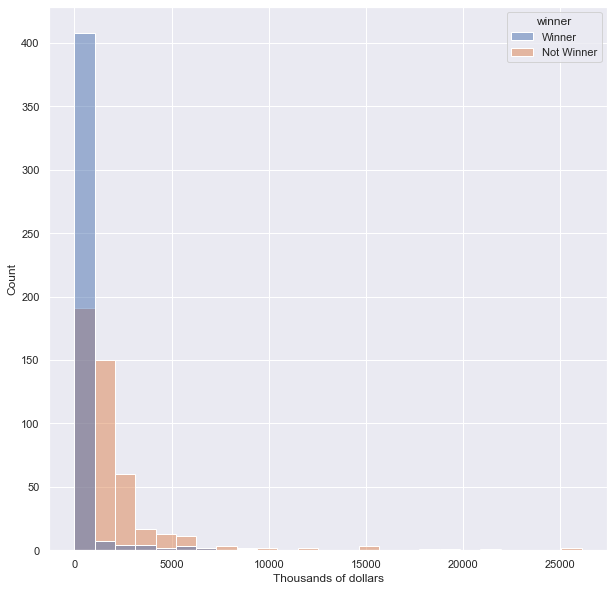

In [55]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.histplot(
    data = candidate_df, 
    x = (candidate_df['raised_dif']/1000), 
    hue = 'winner',
    bins=25
)
plt.xlabel('Thousands of dollars');

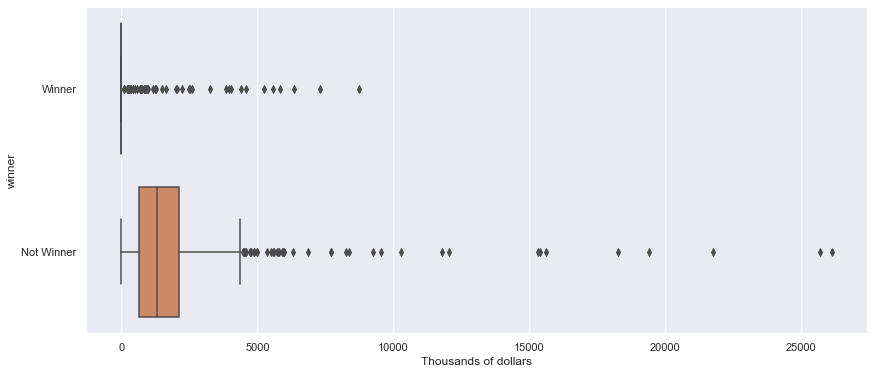

In [60]:
fig, ax = plt.subplots(figsize = (14,6))

sns.boxplot(
            data=candidate_df, 
            x=candidate_df['raised_dif']/1000, 
            y='winner', 
            ax=ax
)
plt.xlabel('Thousands of dollars');

In [58]:
candidate_df['spent_dif'] = candidate_df['max_spent'] - candidate_df['spent']
candidate_df

,name,party,vote,winner,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent,raised_rank,r_s_dif,raised_dif,spent_dif
0,Jerry Carl,R,64.9%,Winner,Not Incumbent,Alabama,01,1971321,1859349,111973,1971321,1859349,1.0,111972,0,0
1,James Averhart,D,35.0%,Not Winner,Not Incumbent,Alabama,01,80095,78973,1122,1971321,1859349,2.0,1122,1891226,1780376
2,Barry Moore,R,65.3%,Winner,Not Incumbent,Alabama,02,650807,669368,-13633,650807,669368,1.0,-18561,0,0
3,Phyllis Harvey-Hall,D,34.6%,Not Winner,Not Incumbent,Alabama,02,56050,55988,0,650807,669368,2.0,62,594757,613380
4,Mike D Rogers,R,67.5%,Winner,Incumbent,Alabama,03,1193111,1218564,502234,1193111,1218564,1.0,-25453,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Tricia Zunker,D,39.2%,Not Winner,Not Incumbent,Wisconsin,07,1261957,1232690,29267,2637459,2514740,2.0,29267,1375502,1282050
888,Mike Gallagher,R,64.0%,Winner,Incumbent,Wisconsin,08,3202905,2841801,1169362,3202905,2841801,1.0,361104,0,0
889,Amanda Stuck,D,36.0%,Not Winner,Not Incumbent,Wisconsin,08,416978,399916,2165,3202905,2841801,2.0,17062,2785927,2441885
890,Liz Cheney,R,68.6%,Winner,Incumbent,Wyoming,01,3003883,3060167,153567,3003883,3060167,1.0,-56284,0,0


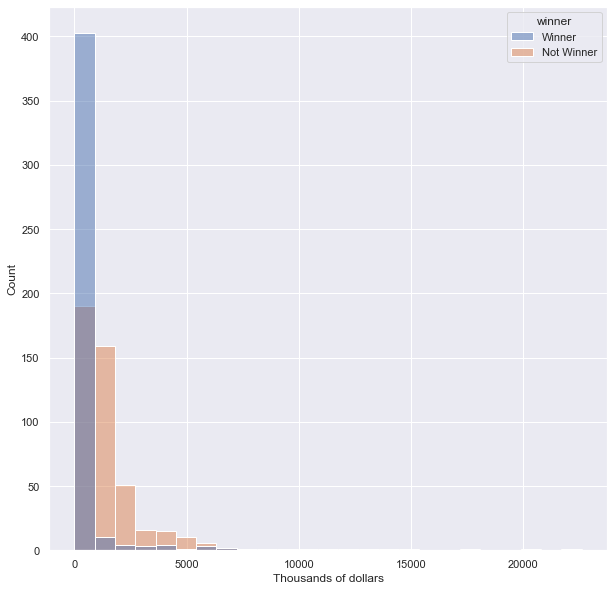

In [59]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.histplot(
    data = candidate_df, 
    x = (candidate_df['spent_dif']/1000), 
    hue = 'winner',
    bins=25
)
plt.xlabel('Thousands of dollars');

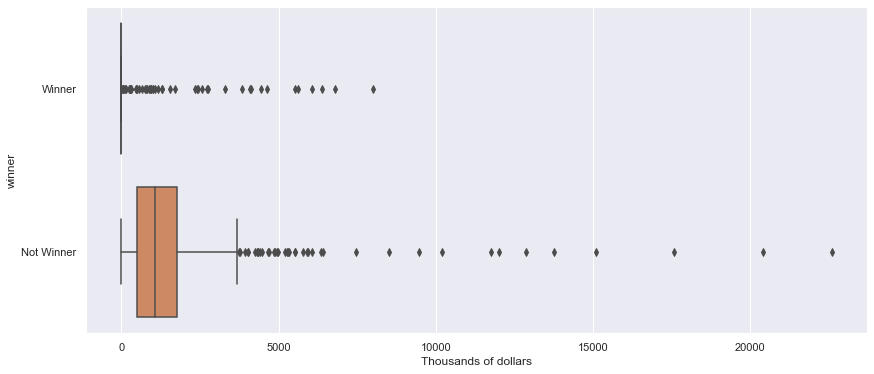

In [62]:
fig, ax = plt.subplots(figsize = (14,6))

sns.boxplot(
            data=candidate_df, 
            x=candidate_df['spent_dif']/1000, 
            y='winner', 
            ax=ax
)
plt.xlabel('Thousands of dollars');

d. How often does the incumbent candidate win a race?  

In [23]:
candidate_df.loc[(candidate_df['incumbent'] == 'Incumbent') & (candidate_df['winner'] == 'Winner')]

,name,party,vote,winner,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent
4,Mike D Rogers,R,67.5%,Winner,Incumbent,Alabama,03,1193111,1218564,502234,1193111,1218564
6,Robert B Aderholt,R,82.5%,Winner,Incumbent,Alabama,04,1255076,1323812,647004,1255076,1323812
7,Mo Brooks,R,95.8%,Winner,Incumbent,Alabama,05,655365,210045,1137501,655365,210045
8,Gary Palmer,R,97.1%,Winner,Incumbent,Alabama,06,907219,909082,370688,907219,909082
9,Terri Sewell,D,97.2%,Winner,Incumbent,Alabama,07,2168165,1495957,2243480,2168165,1495957
...,...,...,...,...,...,...,...,...,...,...,...,...
881,Gwen Moore,D,74.7%,Winner,Incumbent,Wisconsin,04,1183995,1166739,34000,1183995,1166739
884,Glenn S Grothman,R,59.3%,Winner,Incumbent,Wisconsin,06,1815756,1736659,269431,1815756,1736659
886,Tom Tiffany,R,60.8%,Winner,Incumbent,Wisconsin,07,2637459,2514740,122719,2637459,2514740
888,Mike Gallagher,R,64.0%,Winner,Incumbent,Wisconsin,08,3202905,2841801,1169362,3202905,2841801


e. Can you detect any relationship between amount of money raised and the incumbent status of a candidate?

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

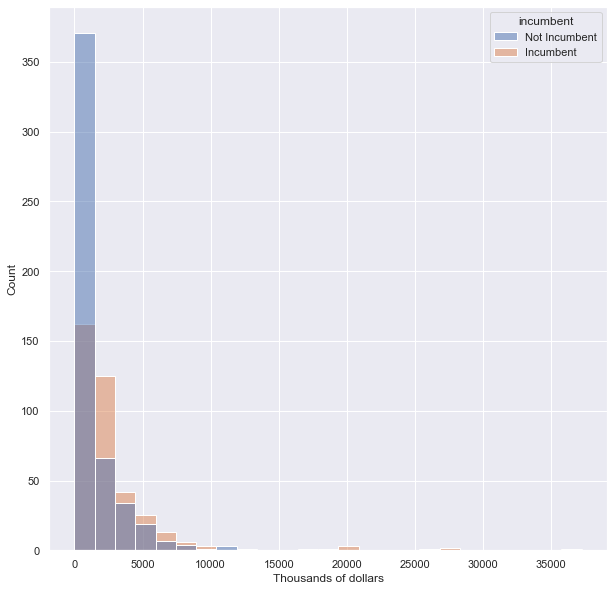

In [44]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.histplot(
    data = candidate_df, 
    x = (candidate_df['raised']/1000), 
    hue = 'incumbent',
    bins=25
)
plt.xlabel('Thousands of dollars');

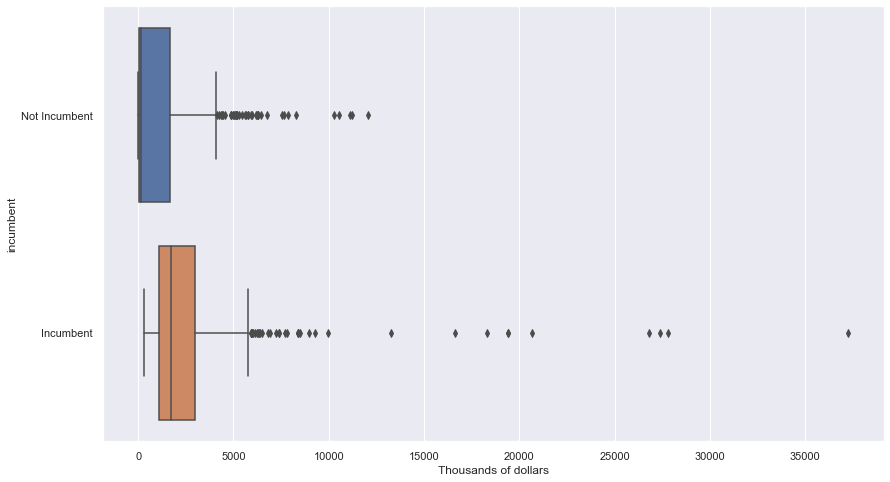

In [51]:
fig, ax = plt.subplots(figsize = (14,8))

sns.boxplot(
            data=candidate_df, 
            x=candidate_df['raised']/1000, 
            y='incumbent', 
            ax=ax
)
plt.xlabel('Thousands of dollars');

In [30]:
candidate_df['raised_rank'] = candidate_df.groupby(['state', 'district'])['raised'].rank(method='first', ascending=False)
candidate_df

,name,party,vote,winner,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent,raised_rank
0,Jerry Carl,R,64.9%,Winner,Not Incumbent,Alabama,01,1971321,1859349,111973,1971321,1859349,1.0
1,James Averhart,D,35.0%,Not Winner,Not Incumbent,Alabama,01,80095,78973,1122,1971321,1859349,2.0
2,Barry Moore,R,65.3%,Winner,Not Incumbent,Alabama,02,650807,669368,-13633,650807,669368,1.0
3,Phyllis Harvey-Hall,D,34.6%,Not Winner,Not Incumbent,Alabama,02,56050,55988,0,650807,669368,2.0
4,Mike D Rogers,R,67.5%,Winner,Incumbent,Alabama,03,1193111,1218564,502234,1193111,1218564,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Tricia Zunker,D,39.2%,Not Winner,Not Incumbent,Wisconsin,07,1261957,1232690,29267,2637459,2514740,2.0
888,Mike Gallagher,R,64.0%,Winner,Incumbent,Wisconsin,08,3202905,2841801,1169362,3202905,2841801,1.0
889,Amanda Stuck,D,36.0%,Not Winner,Not Incumbent,Wisconsin,08,416978,399916,2165,3202905,2841801,2.0
890,Liz Cheney,R,68.6%,Winner,Incumbent,Wyoming,01,3003883,3060167,153567,3003883,3060167,1.0


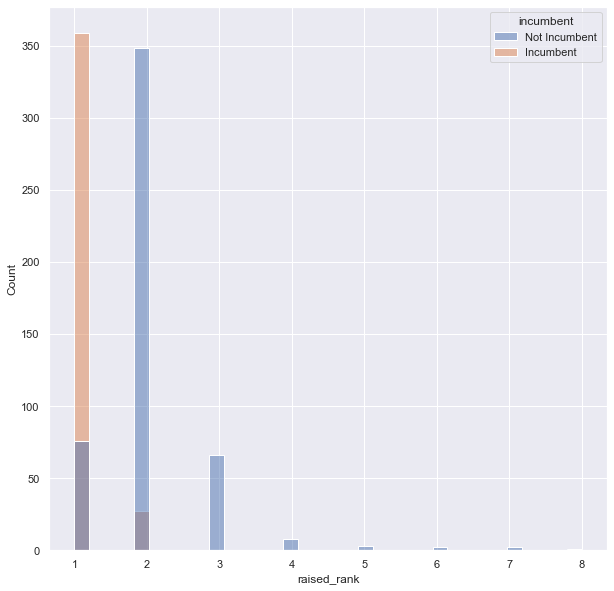

In [46]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.histplot(
    data = candidate_df, 
    x = 'raised_rank', 
    hue = 'incumbent'
);

In [49]:
candidate_df.groupby('incumbent')['raised_rank'].value_counts()

incumbent      raised_rank
Incumbent      1.0            359
               2.0             27
Not Incumbent  2.0            348
               1.0             76
               3.0             66
               4.0              8
               5.0              3
               6.0              2
               7.0              2
               8.0              1
Name: raised_rank, dtype: int64

In [67]:
candidate_df['winner_num'] = [1 if x == 'Winner' else 0 for x in candidate_df['winner']]
candidate_df['incumbent_num'] = [1 if x == 'Incumbent' else 0 for x in candidate_df['incumbent']]
candidate_df

,name,party,vote,winner,incumbent,state,district,raised,spent,cash_on_hand,max_raised,max_spent,raised_rank,r_s_dif,raised_dif,spent_dif,winner_num,incumbent_num
0,Jerry Carl,R,64.9%,Winner,Not Incumbent,Alabama,01,1971321,1859349,111973,1971321,1859349,1.0,111972,0,0,1,0
1,James Averhart,D,35.0%,Not Winner,Not Incumbent,Alabama,01,80095,78973,1122,1971321,1859349,2.0,1122,1891226,1780376,0,0
2,Barry Moore,R,65.3%,Winner,Not Incumbent,Alabama,02,650807,669368,-13633,650807,669368,1.0,-18561,0,0,1,0
3,Phyllis Harvey-Hall,D,34.6%,Not Winner,Not Incumbent,Alabama,02,56050,55988,0,650807,669368,2.0,62,594757,613380,0,0
4,Mike D Rogers,R,67.5%,Winner,Incumbent,Alabama,03,1193111,1218564,502234,1193111,1218564,1.0,-25453,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,Tricia Zunker,D,39.2%,Not Winner,Not Incumbent,Wisconsin,07,1261957,1232690,29267,2637459,2514740,2.0,29267,1375502,1282050,0,0
888,Mike Gallagher,R,64.0%,Winner,Incumbent,Wisconsin,08,3202905,2841801,1169362,3202905,2841801,1.0,361104,0,0,1,1
889,Amanda Stuck,D,36.0%,Not Winner,Not Incumbent,Wisconsin,08,416978,399916,2165,3202905,2841801,2.0,17062,2785927,2441885,0,0
890,Liz Cheney,R,68.6%,Winner,Incumbent,Wyoming,01,3003883,3060167,153567,3003883,3060167,1.0,-56284,0,0,1,1


In [68]:
candidate_df.corr()

,raised,spent,cash_on_hand,max_raised,max_spent,raised_rank,r_s_dif,raised_dif,spent_dif,winner_num,incumbent_num
raised,1.000000,0.977278,0.585574,0.758857,0.749271,-0.317483,0.637525,-0.106332,-0.112277,0.272329,0.274661
spent,0.977278,1.000000,0.437322,0.748107,0.775835,-0.313872,0.459739,-0.094004,-0.100469,0.248204,0.251672
cash_on_hand,0.585574,0.437322,1.000000,0.373293,0.256253,-0.300468,0.863819,-0.170780,-0.174880,0.388391,0.413044
max_raised,0.758857,0.748107,0.373293,1.000000,0.969797,-0.008794,0.460192,0.566874,0.538877,-0.013314,-0.010500
max_spent,0.749271,0.775835,0.256253,0.969797,1.000000,-0.005428,0.319243,0.532886,0.549796,-0.017270,-0.020543
raised_rank,-0.317483,-0.313872,-0.300468,-0.008794,-0.005428,1.000000,-0.189308,0.388172,0.406978,-0.647618,-0.627970
r_s_dif,0.637525,0.459739,0.863819,0.460192,0.319243,-0.189308,1.000000,-0.103820,-0.105227,0.238814,0.235981
raised_dif,-0.106332,-0.094004,-0.170780,0.566874,0.532886,0.388172,-0.103820,1.000000,0.964775,-0.364808,-0.363462
spent_dif,-0.112277,-0.100469,-0.174880,0.538877,0.549796,0.406978,-0.105227,0.964775,1.000000,-0.355832,-0.365585
winner_num,0.272329,0.248204,0.388391,-0.013314,-0.017270,-0.647618,0.238814,-0.364808,-0.355832,1.000000,0.835376
